In [ ]:
from Model import *
from View import *
from library import *

Scratchpad area: update the above segments as required with the model.py and library.py

In [ ]:
video = Video("Tests/5/ball.mp4", (255, 255, 255))
video.incrementFrame()
print(video.getDimensions())
print(video.getFPS())

side = Video("Tests/5/side.mp4", (255, 255, 255))
side.incrementFrame()
print(side.getDimensions())
print(side.getFPS())

model = Model(video, side)

Side: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] [1476, 1434, 1391, 1349, 1307, 1264, 1220, 1174, 1131, 1086, 1041, 992, 950, 909, 859, 811, 769, 719, 671]


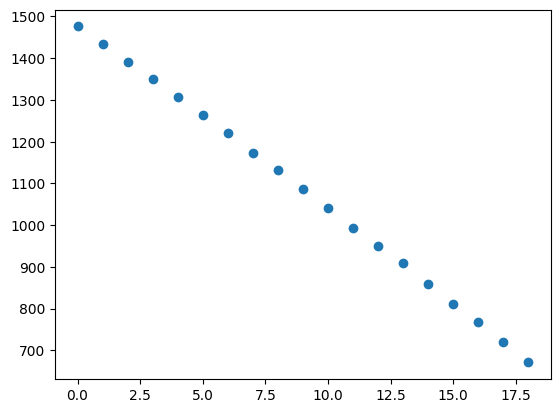

Line: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] [529, 529, 529, 526, 525, 525, 525, 524, 525, 524, 523, 523, 521, 521, 521]


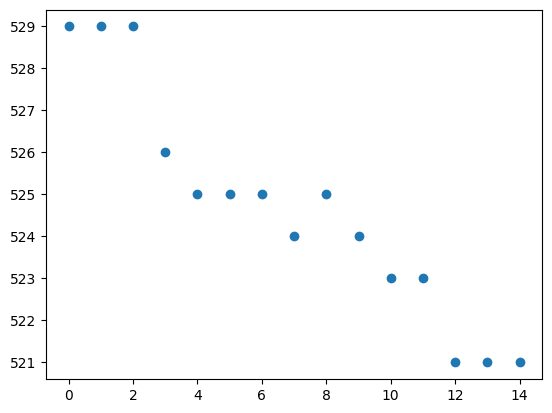

Height: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] [716, 701, 676, 648, 623, 598, 578, 551, 541, 521, 493, 475, 473, 450, 445, 428, 417, 413, 403]


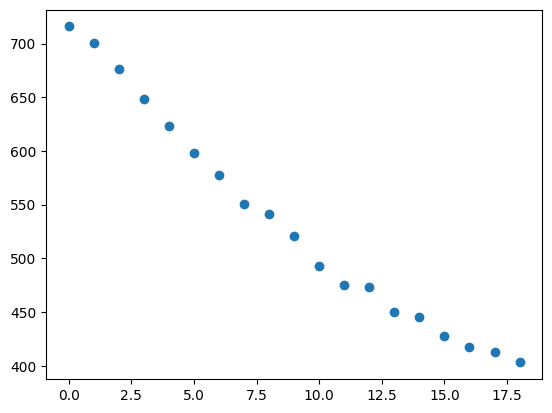

519 392


In [ ]:
root = tk.Tk()
root.title("Backyard DRS")
video.incrementFrame()
view = VideoView(root, 540, 960)
view.pack(side=tk.LEFT)
newFrame = video.getCurrentFrame()

rightFrame = tk.Frame(root)
rightFrame.pack(side=tk.LEFT, fill=tk.BOTH)
sideView = VideoView(rightFrame, 960, 540)
sideView.pack(side=tk.TOP)


def updateView():
    renderings = model.render()
    frontRender = renderings[View.FRONT]
    sideRender = renderings[View.SIDE]
    view.updateFrame(frontRender.frame, frontRender.circles, frontRender.cropRegion, frontRender.verticalLines)
    sideView.updateFrame(sideRender.frame, sideRender.circles, sideRender.cropRegion, sideRender.verticalLines)

def incrementAndUpdate(view: View):
    model.incrementFrame(view)
    updateView()

def updateParams(view: VideoView, parameters):
    model.updateParameters(view, parameters)
    updateView()

def updateCropRegion(view: View, start, end):
    model.cropRegion(view, start, end)
    updateView()

def updateStumpPosition(x):
    model.setStumpPosition(x)
    updateView()

controlBar = VideoControlBar(
    rightFrame, "Front Angle", video.getDimensions(),
    lambda params: updateParams(View.FRONT, params),
    lambda start, end: updateCropRegion(View.FRONT, start, end),
    lambda: incrementAndUpdate(View.FRONT),
    lambda: model.markFirstFrame(View.FRONT)
)
controlBar.getFrame().pack(side=tk.TOP, fill=tk.X)
controlBar2 = VideoControlBar(
    rightFrame, "Side Angle", side.getDimensions(),
    lambda params: updateParams(View.SIDE, params),
    lambda start, end: updateCropRegion(View.SIDE, start, end),
    lambda: incrementAndUpdate(View.SIDE),
    lambda: model.markFirstFrame(View.SIDE)
)
controlBar2.getFrame().pack(side=tk.TOP, fill=tk.X)

master = MasterControlBar(rightFrame, model.makePrediction, model.linkVideos, updateStumpPosition, side.getDimensions())
master.getFrame().pack(side=tk.TOP, fill=tk.X)

root.mainloop() 

In [4]:
cv.destroyAllWindows()

In [5]:
print(side.getPoints())

[(1476, 716, 16, 0), (1434, 701, 17, 1), (1391, 676, 19, 2), (1349, 648, 17, 3), (1307, 623, 17, 4), (1264, 598, 16, 5), (1220, 578, 19, 6), (1174, 551, 11, 7), (1131, 541, 22, 8), (1086, 521, 21, 9), (1041, 493, 12, 10), (992, 475, 9, 11), (950, 473, 23, 12), (909, 450, 13, 13), (859, 445, 22, 14), (811, 428, 17, 15), (769, 417, 14, 16), (719, 413, 22, 17), (671, 403, 18, 18)]
